In [499]:
from module import *
import pandas as pd
import numpy as np
from IPython.display import Latex, display_latex

In [500]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [501]:
PRECISION = 3
np.set_printoptions(precision=PRECISION, suppress=True)
pd.options.display.float_format = "{:.3f}".format

## Data input

$$ \bar{P1ia} - \bar{P1ib} = R_A \tan{\frac{\alpha}{2}} + R_B \tan{\frac{\beta}{2}} $$
$$ \bar{P1ib} - \bar{P1ic} = R_B \tan{\frac{\beta}{2}} + R_C \tan{\frac{\theta}{2}} $$

In [502]:
# R -> Radios
# < -> Angulos en º
data = np.array(
    [
        # R           # <
        (, np.deg2rad(53.30472)),
        (240.6567417, np.deg2rad(71.30472)),
        (128.4983846, np.deg2rad(42.06389)),
    ],
)
_ = pd.DataFrame(data, columns=['radios', 'angulos'])
__ = _.apply({'radios': lambda x: x, 'angulos': np.rad2deg})
__

,radios,angulos
0,194.455,53.305
1,240.657,71.305
2,128.498,42.064


In [503]:
subtangentes = st_vec(data)
for idx, row in __.iterrows():
    A = np.float32(row['angulos'])
    R = np.float32(row['radios'])
    string = f'$ {R} \\times \\tan{A / 2}º \\qquad = {round(subtangentes[idx], PRECISION)} $'
    display_latex(Latex(string))
    
_['subtangentes'] = subtangentes
angulos = copy.deepcopy(_['angulos'])
_

,radios,angulos,subtangentes
0,194.455,0.930,97.598
1,240.657,1.245,172.626
2,128.498,0.734,49.408


In [504]:
# Calculo de diagonales
diag_vec(data[::-1], st_=True)

array([[ 162.046,    1.979],
       [1721.508,    2.909]])

In [505]:
# Calculo de cotas
cotas = p_total(data, pi=0)
cotas + np.abs(np.min(cotas)) + 10_054.302

array([10054.302, 10235.212, 10534.71 , 10629.047])

In [506]:
expanded = expand__(data, pi=np.abs(np.min(cotas)) + 10_054.302, prec=10)
_ = pd.DataFrame(expanded, columns=['radio', 'angulo', 'cota', 'D'])
radio_pre0 = _['radio']
radio_pre0 = list(pd.concat([pd.Series([0]), radio_pre0[:-1]]))
radio_pre0 = np.array(radio_pre0)
_['radio_pre0'] = radio_pre0
# _['gamma'] = gamma_vec(expanded[:,1:3])
# _ = _.apply({'radio': lambda x: x, 'angulo': np.rad2deg, 'cota': lambda x: x, 'D': lambda x: x})
_

,radio,angulo,cota,D,radio_pre0
0,194.455,0.930,10054.302,0.000,0.000
1,194.455,0.930,10060.000,5.698,194.455
2,194.455,0.930,10070.000,10.000,194.455
3,194.455,0.930,10080.000,10.000,194.455
4,194.455,0.930,10090.000,10.000,194.455
...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498
57,128.498,0.734,10600.000,10.000,128.498
58,128.498,0.734,10610.000,10.000,128.498
59,128.498,0.734,10620.000,10.000,128.498


In [507]:
_['gamma'] = _['D'] / (2 * _['radio'])
_

,radio,angulo,cota,D,radio_pre0,gamma
0,194.455,0.930,10054.302,0.000,0.000,0.000
1,194.455,0.930,10060.000,5.698,194.455,0.015
2,194.455,0.930,10070.000,10.000,194.455,0.026
3,194.455,0.930,10080.000,10.000,194.455,0.026
4,194.455,0.930,10090.000,10.000,194.455,0.026
...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039
57,128.498,0.734,10600.000,10.000,128.498,0.039
58,128.498,0.734,10610.000,10.000,128.498,0.039
59,128.498,0.734,10620.000,10.000,128.498,0.039


In [508]:
_['D_sum'] = np.add.accumulate(_['D'])
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum
0,194.455,0.930,10054.302,0.000,0.000,0.000,0.000
1,194.455,0.930,10060.000,5.698,194.455,0.015,5.698
2,194.455,0.930,10070.000,10.000,194.455,0.026,15.698
3,194.455,0.930,10080.000,10.000,194.455,0.026,25.698
4,194.455,0.930,10090.000,10.000,194.455,0.026,35.698
...,...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039,535.698
57,128.498,0.734,10600.000,10.000,128.498,0.039,545.698
58,128.498,0.734,10610.000,10.000,128.498,0.039,555.698
59,128.498,0.734,10620.000,10.000,128.498,0.039,565.698


In [509]:
_['gamma_sum'] = np.add.accumulate(_['gamma'])
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum
0,194.455,0.930,10054.302,0.000,0.000,0.000,0.000,0.000
1,194.455,0.930,10060.000,5.698,194.455,0.015,5.698,0.015
2,194.455,0.930,10070.000,10.000,194.455,0.026,15.698,0.040
3,194.455,0.930,10080.000,10.000,194.455,0.026,25.698,0.066
4,194.455,0.930,10090.000,10.000,194.455,0.026,35.698,0.092
...,...,...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039,535.698,1.309
57,128.498,0.734,10600.000,10.000,128.498,0.039,545.698,1.347
58,128.498,0.734,10610.000,10.000,128.498,0.039,555.698,1.386
59,128.498,0.734,10620.000,10.000,128.498,0.039,565.698,1.425


In [510]:
radio_pre0 / 2

array([  0.   ,  97.227,  97.227,  97.227,  97.227,  97.227,  97.227,
        97.227,  97.227,  97.227,  97.227,  97.227,  97.227,  97.227,
        97.227,  97.227,  97.227,  97.227,  97.227,  97.227, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328, 120.328, 120.328, 120.328, 120.328, 120.328,
       120.328, 120.328,  64.249,  64.249,  64.249,  64.249,  64.249,
        64.249,  64.249,  64.249,  64.249,  64.249])

In [511]:
# Gamma_sum se encuentra en radianes
_['lc'] = ( np.sin(_['gamma_sum']/2) * radio_pre0 * 4 )
_['lc - D_sum'] = _['lc'] - _['D_sum']
_

c:\Users\Cesar\.conda\envs\ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum
0,194.455,0.930,10054.302,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,194.455,0.930,10060.000,5.698,194.455,0.015,5.698,0.015,5.698,-0.000
2,194.455,0.930,10070.000,10.000,194.455,0.026,15.698,0.040,15.697,-0.001
3,194.455,0.930,10080.000,10.000,194.455,0.026,25.698,0.066,25.693,-0.005
4,194.455,0.930,10090.000,10.000,194.455,0.026,35.698,0.092,35.685,-0.013
...,...,...,...,...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039,535.698,1.309,312.804,-222.894
57,128.498,0.734,10600.000,10.000,128.498,0.039,545.698,1.347,320.680,-225.018
58,128.498,0.734,10610.000,10.000,128.498,0.039,555.698,1.386,328.434,-227.264
59,128.498,0.734,10620.000,10.000,128.498,0.039,565.698,1.425,336.063,-229.635


Ya que utilizamos un sentido antihorario, tenemos que utilizar un azimut inverso al del útlimo punto y restando las diferencias generadas en lugar de sumarlas.
$$ \text{Azimut}_{\text{inverso}} = 180º - \text{Azimut} $$

In [512]:
az_init = np.pi - np.deg2rad(110.38194444)
_['azimut_inv'] = _['gamma_sum'] + az_init
_

,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv
0,194.455,0.930,10054.302,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.215
1,194.455,0.930,10060.000,5.698,194.455,0.015,5.698,0.015,5.698,-0.000,1.230
2,194.455,0.930,10070.000,10.000,194.455,0.026,15.698,0.040,15.697,-0.001,1.255
3,194.455,0.930,10080.000,10.000,194.455,0.026,25.698,0.066,25.693,-0.005,1.281
4,194.455,0.930,10090.000,10.000,194.455,0.026,35.698,0.092,35.685,-0.013,1.307
...,...,...,...,...,...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039,535.698,1.309,312.804,-222.894,2.524
57,128.498,0.734,10600.000,10.000,128.498,0.039,545.698,1.347,320.680,-225.018,2.563
58,128.498,0.734,10610.000,10.000,128.498,0.039,555.698,1.386,328.434,-227.264,2.601
59,128.498,0.734,10620.000,10.000,128.498,0.039,565.698,1.425,336.063,-229.635,2.640


$$
\begin{align*}
N &= N_{\text{anterior}} + L_c \times \cos(\text{Azimut}_\text{inverso}) \\
E &= E_{\text{anterior}} - L_c \times \sin(\text{Azimut}_\text{inverso})
\end{align*}
$$

In [513]:
N_init = 8_822_222
E_init = 482_777
_['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
_['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)
_['N'] = _['delta_N'] + N_init
_['E'] = _['delta_E'] + E_init
_

C:\Users\Cesar\AppData\Local\Temp\ipykernel_13260\2004008128.py:3: RuntimeWarning: invalid value encountered in cos
  _['delta_N'] = _[['azimut_inv', 'lc']].apply(lambda x: np.cos(x['azimut_inv']) * x['lc'], axis=1)
C:\Users\Cesar\AppData\Local\Temp\ipykernel_13260\2004008128.py:4: RuntimeWarning: invalid value encountered in sin
  _['delta_E'] = _[['azimut_inv', 'lc']].apply(lambda x: -np.sin(x['azimut_inv']) * x['lc'], axis=1)


,radio,angulo,cota,D,radio_pre0,gamma,D_sum,gamma_sum,lc,lc - D_sum,azimut_inv,delta_N,delta_E,N,E
0,194.455,0.930,10054.302,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.215,0.000,-0.000,8822222.000,482777.000
1,194.455,0.930,10060.000,5.698,194.455,0.015,5.698,0.015,5.698,-0.000,1.230,1.906,-5.370,8822223.906,482771.630
2,194.455,0.930,10070.000,10.000,194.455,0.026,15.698,0.040,15.697,-0.001,1.255,4.869,-14.923,8822226.869,482762.077
3,194.455,0.930,10080.000,10.000,194.455,0.026,25.698,0.066,25.693,-0.005,1.281,7.339,-24.623,8822229.339,482752.377
4,194.455,0.930,10090.000,10.000,194.455,0.026,35.698,0.092,35.685,-0.013,1.307,9.310,-34.450,8822231.310,482742.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,128.498,0.734,10590.000,10.000,128.498,0.039,535.698,1.309,312.804,-222.894,2.524,-254.948,-181.240,8821967.052,482595.760
57,128.498,0.734,10600.000,10.000,128.498,0.039,545.698,1.347,320.680,-225.018,2.563,-268.397,-175.495,8821953.603,482601.505
58,128.498,0.734,10610.000,10.000,128.498,0.039,555.698,1.386,328.434,-227.264,2.601,-281.671,-168.909,8821940.329,482608.091
59,128.498,0.734,10620.000,10.000,128.498,0.039,565.698,1.425,336.063,-229.635,2.640,-294.719,-161.490,8821927.281,482615.510


In [514]:
np.rad2deg(az_init)

69.61805556

In [515]:
np.rad2deg(2.640)

151.26085791453733

In [516]:
np.max(abs(_['lc - D_sum']))

229.63488883562854

In [517]:
_.query('radio != radio_pre0')['lc - D_sum'].iloc[:]

0     0.000
19   -2.600
50   20.030
60      NaN
Name: lc - D_sum, dtype: float64

In [518]:
iiter = iter(_.query('radio != radio_pre0')['lc - D_sum'].iloc[:])

In [519]:
next(iiter)

0.0

In [520]:
len(_)

61

In [521]:
# def iiter(dataframe):
#     llist = []
#     counter = 0
#     buffer = []
#     summs = iter(_.query('radio != radio_pre0')['lc - D_sum'].iloc[:])
#     act = next(summs)
#     for idx , row in dataframe.iterrows():
#         # print(row['radio'])
#         # break
#         if act == np.inf or act == - np.inf:
#             act = 0
#         if idx == len(dataframe) - 1:
#             break
#         if row['radio'] != row['radio_pre0']:
#             #
#             act = next(summs)
#         # print(type(row['gamma'] - row / (2 * row['radio'])))
#         yield - act / (2 * row['radio'])
    

In [522]:
# pd.DataFrame(iiter(_))

In [523]:
_.to_excel("test.xlsx", index=False)
np.add.accumulate(angulos / 2)[0]

PermissionError: [Errno 13] Permission denied: 'test.xlsx'

In [ ]:
angulos

0   0.930
1   1.245
2   0.734
Name: angulos, dtype: float64

In [ ]:
# def azimuts_(matrix):
    

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='E', ylabel='N'>

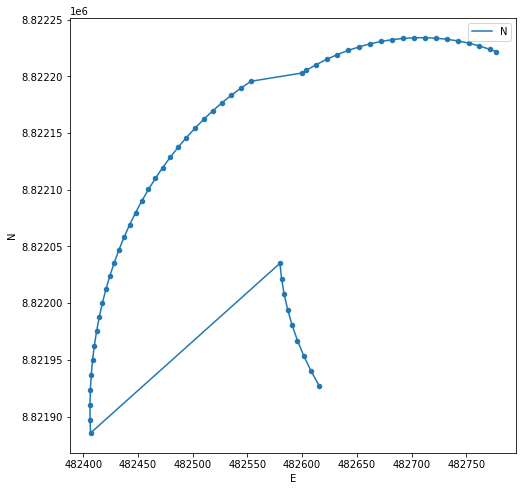

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_[['N', 'E']].plot(x='E', y='N', kind='scatter', ax=ax)
_[['N', 'E']].plot(x='E', y='N', ax=ax)
